In [42]:
import requests
import numpy as np
import json
import pandas as pd

import copy


import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import datetime

In [43]:
df1=pd.read_csv('ideal_load_1_zone_v2.csv')

In [44]:
def process_model_data_time1(model_data):

    model_data['datetime'] = pd.to_datetime(model_data["datetime"]) 

    model_data_new=model_data.set_index('datetime')
    #model_data_new['date']=model_data_new.index.date
    #model_data_new['time']=model_data_new.index.time
    return model_data_new

In [45]:
df1=process_model_data_time1(df1)

In [46]:
df2=pd.read_csv('1zone_model.csv')

In [47]:
def process_model_data_time2(model_data):
    datetime_range = pd.date_range(start='2021-01-01 00:00:00', end='2021-12-31 23:00:00', freq='H')

    # Create a new DataFrame with the datetime range
    df_datetime = pd.DataFrame({'datetime': datetime_range})
    model_data['datetime'] = datetime_range
    
    model_data['datetime'] = pd.to_datetime(model_data["datetime"]) 

    model_data_new=model_data.set_index('datetime')
    #model_data_new['date']=model_data_new.index.date
    #model_data_new['time']=model_data_new.index.time
    return model_data_new

In [48]:
df2=process_model_data_time2(df2)

C:\Users\btuser\AppData\Local\Temp\ipykernel_21696\421699932.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datetime_range = pd.date_range(start='2021-01-01 00:00:00', end='2021-12-31 23:00:00', freq='H')


In [49]:
df2

,Date/Time,BLOCK1:ZONE1:Zone Infiltration Current Density Volume Flow Rate [m3/s](Hourly),BLOCK1:ZONE1:Zone Air System Sensible Heating Rate [W](Hourly),BLOCK1:ZONE1:Zone Air System Sensible Cooling Rate [W](Hourly),BLOCK1:ZONE1:Zone Air Temperature [C](Hourly),BLOCK1:ZONE1:Zone Air Relative Humidity [%](Hourly),NODE BLOCK1:ZONE1 IN:System Node Pressure [Pa](Hourly),NODE BLOCK1:ZONE1 ZONE:System Node Pressure [Pa](Hourly),NODE BLOCK1:ZONE1 OUT:System Node Pressure [Pa](Hourly),BLOCK1:ZONE1 IDEAL LOADS AIR OUTDOOR AIR INLET NODE:System Node Pressure [Pa](Hourly)
datetime,,,,,,,,,,
2021-01-01 00:00:00,01/01 01:00:00,0.014624,8272.840865,0.0,20.0,6.529681,97625.0,97625.0,97625.0,97662.5
2021-01-01 01:00:00,01/01 02:00:00,0.015002,8995.441942,0.0,20.0,6.355424,97625.0,97625.0,97625.0,97700.0
2021-01-01 02:00:00,01/01 03:00:00,0.014950,9313.681785,0.0,20.0,6.203311,97625.0,97625.0,97625.0,97762.5
2021-01-01 03:00:00,01/01 04:00:00,0.015173,9632.861615,0.0,20.0,6.088175,97625.0,97625.0,97625.0,97800.0
2021-01-01 04:00:00,01/01 05:00:00,0.015082,9790.319770,0.0,20.0,5.998730,97625.0,97625.0,97625.0,97800.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,12/31 20:00:00,0.011617,1162.515883,0.0,20.0,19.821816,97625.0,97625.0,97625.0,97100.0
2021-12-31 20:00:00,12/31 21:00:00,0.011298,1241.952273,0.0,20.0,19.539156,97625.0,97625.0,97625.0,97100.0
2021-12-31 21:00:00,12/31 22:00:00,0.011897,1373.583901,0.0,20.0,19.367217,97625.0,97625.0,97625.0,97162.5


In [50]:
df1.dtypes

outdoor_air_temperature        float64
infiltration_zone_1            float64
thermal_load_zone_1            float64
cooling_load_zone_1            float64
heating_load_zone_1            float64
zone_air_temperature_zone_1    float64
relative_humidity_zone_1       float64
pressure_zone_1                float64
dtype: object

In [51]:
df2.dtypes

Date/Time                                                                                  object
BLOCK1:ZONE1:Zone Infiltration Current Density Volume Flow Rate [m3/s](Hourly)            float64
BLOCK1:ZONE1:Zone Air System Sensible Heating Rate [W](Hourly)                            float64
BLOCK1:ZONE1:Zone Air System Sensible Cooling Rate [W](Hourly)                            float64
BLOCK1:ZONE1:Zone Air Temperature [C](Hourly)                                             float64
BLOCK1:ZONE1:Zone Air Relative Humidity [%](Hourly)                                       float64
NODE BLOCK1:ZONE1 IN:System Node Pressure [Pa](Hourly)                                    float64
NODE BLOCK1:ZONE1 ZONE:System Node Pressure [Pa](Hourly)                                  float64
NODE BLOCK1:ZONE1 OUT:System Node Pressure [Pa](Hourly)                                   float64
BLOCK1:ZONE1 IDEAL LOADS AIR OUTDOOR AIR INLET NODE:System Node Pressure [Pa](Hourly)     float64
dtype: object

In [52]:
#BLOCK1:ZONE1 zone_1



Text(0, 0.5, 'cooling_load_zone_1')

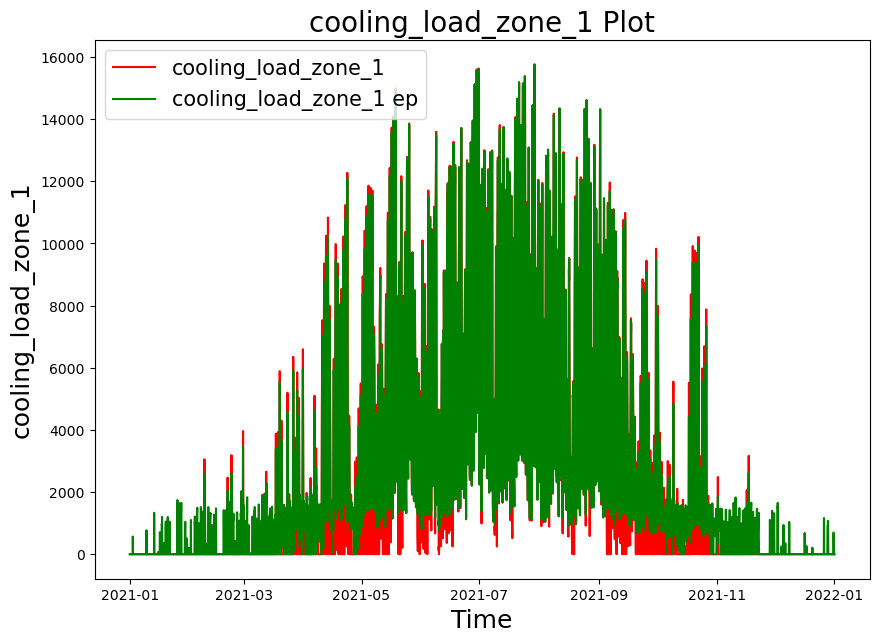

In [53]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,7))
ax.plot(df1['cooling_load_zone_1'], label="cooling_load_zone_1",color="red")
#ax.plot(df1['cooling_load_zone_1']-df2['BLOCK1:ZONE1:Zone Air System Sensible Cooling Rate [W](Hourly)'], label="cooling_load_zone_1",color="red")
ax.plot(df2['BLOCK1:ZONE1:Zone Air System Sensible Cooling Rate [W](Hourly)'], label="cooling_load_zone_1 ep",color="green")


ax.legend(fontsize=15)

ax.set_title(f'cooling_load_zone_1 Plot',fontsize=20)
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('cooling_load_zone_1',fontsize=18)
#ax.set_xlim(datetime.datetime(2021,5,4,0,0,0),datetime.datetime(2021,5,12,0,0,0))

Text(0, 0.5, 'heating_load_zone_1')

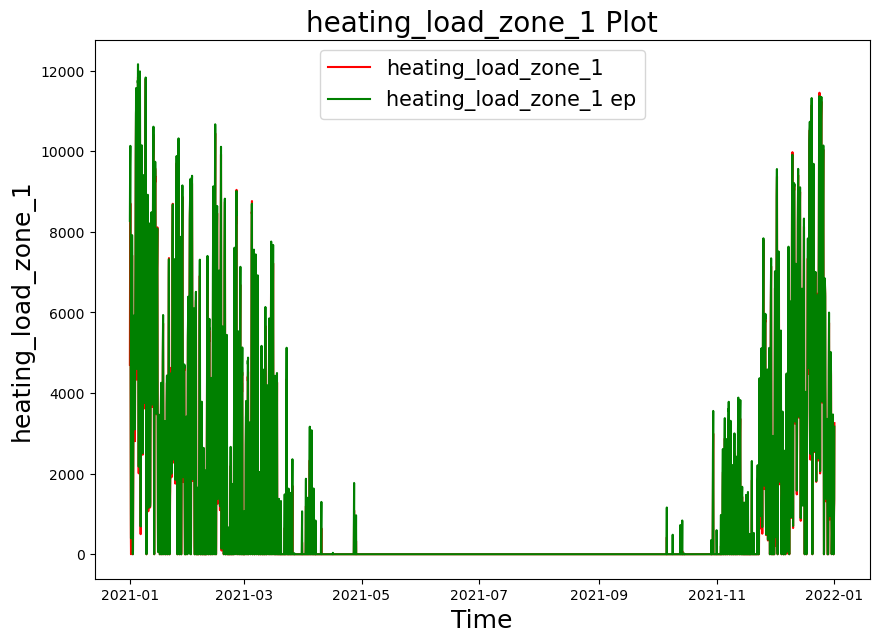

In [54]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,7))

ax.plot(df1['heating_load_zone_1'], label="heating_load_zone_1",color="red")
ax.plot(df2['BLOCK1:ZONE1:Zone Air System Sensible Heating Rate [W](Hourly)'], label="heating_load_zone_1 ep",color="green")

ax.legend(fontsize=15)

ax.set_title(f'heating_load_zone_1 Plot',fontsize=20)
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('heating_load_zone_1',fontsize=18)
#ax.set_xlim(datetime.datetime(2021,2,4,0,0,0),datetime.datetime(2021,2,12,0,0,0))

In [55]:
df2.dtypes

Date/Time                                                                                  object
BLOCK1:ZONE1:Zone Infiltration Current Density Volume Flow Rate [m3/s](Hourly)            float64
BLOCK1:ZONE1:Zone Air System Sensible Heating Rate [W](Hourly)                            float64
BLOCK1:ZONE1:Zone Air System Sensible Cooling Rate [W](Hourly)                            float64
BLOCK1:ZONE1:Zone Air Temperature [C](Hourly)                                             float64
BLOCK1:ZONE1:Zone Air Relative Humidity [%](Hourly)                                       float64
NODE BLOCK1:ZONE1 IN:System Node Pressure [Pa](Hourly)                                    float64
NODE BLOCK1:ZONE1 ZONE:System Node Pressure [Pa](Hourly)                                  float64
NODE BLOCK1:ZONE1 OUT:System Node Pressure [Pa](Hourly)                                   float64
BLOCK1:ZONE1 IDEAL LOADS AIR OUTDOOR AIR INLET NODE:System Node Pressure [Pa](Hourly)     float64
dtype: object

In [56]:
#df2['BLOCK1:ZONE1:Zone Air Relative Humidity [%](Hourly)']

Text(0, 0.5, 'relative_humidity_zone_1')

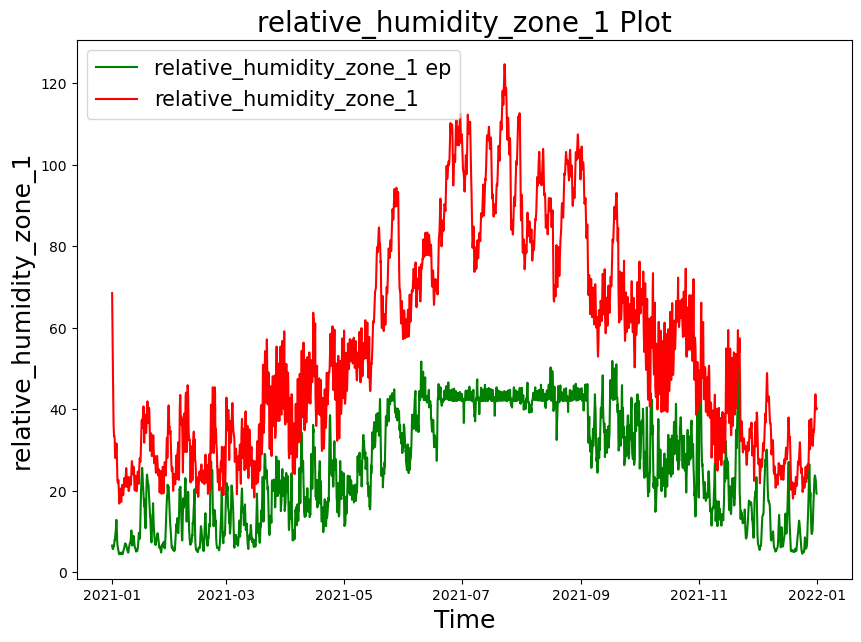

In [57]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,7))
ax.plot(df2['BLOCK1:ZONE1:Zone Air Relative Humidity [%](Hourly)'], label="relative_humidity_zone_1 ep",color="green")

ax.plot(df1['relative_humidity_zone_1'], label="relative_humidity_zone_1",color="red")

ax.legend(fontsize=15)

ax.set_title(f'relative_humidity_zone_1 Plot',fontsize=20)
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('relative_humidity_zone_1',fontsize=18)
#ax.set_xlim(datetime.datetime(2021,5,4,0,0,0),datetime.datetime(2021,5,12,0,0,0))

Text(0, 0.5, 'infiltration_zone_1')

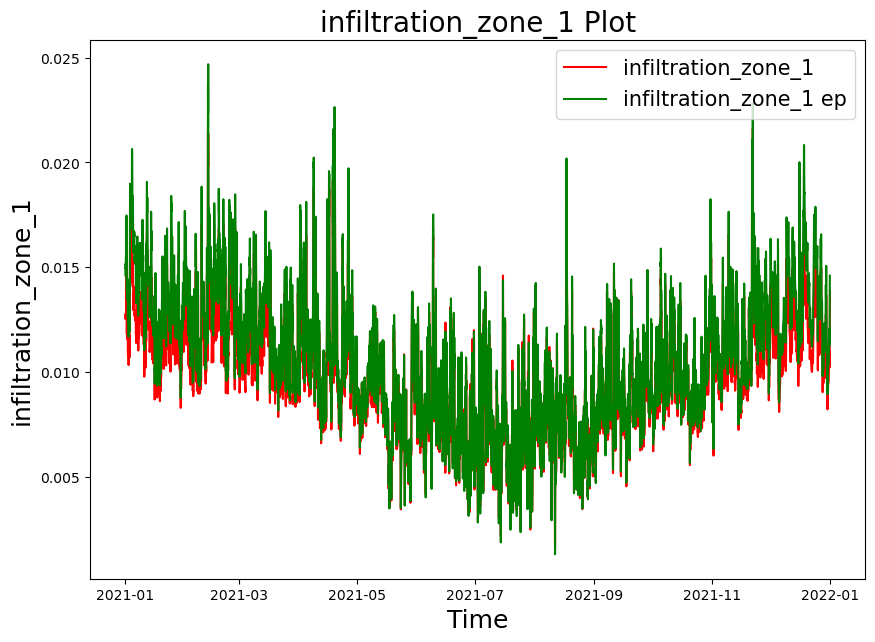

In [58]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,7))

ax.plot(df1['infiltration_zone_1'], label="infiltration_zone_1",color="red")
ax.plot(df2['BLOCK1:ZONE1:Zone Infiltration Current Density Volume Flow Rate [m3/s](Hourly)'], label="infiltration_zone_1 ep",color="green")

ax.legend(fontsize=15)

ax.set_title(f'infiltration_zone_1 Plot',fontsize=20)
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('infiltration_zone_1',fontsize=18)
#ax.set_xlim(datetime.datetime(2021,5,4,0,0,0),datetime.datetime(2021,5,12,0,0,0))

In [59]:
#Zone Air Temperature [C]

Text(0, 0.5, 'zone_air_temperature_zone_1')

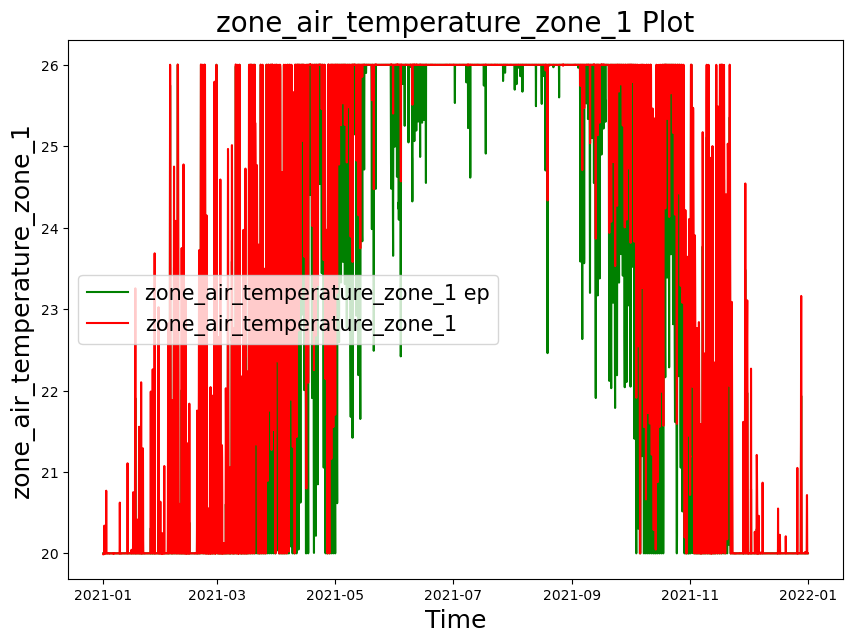

In [60]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,7))
ax.plot(df2['BLOCK1:ZONE1:Zone Air Temperature [C](Hourly)'], label="zone_air_temperature_zone_1 ep",color="green")

ax.plot(df1['zone_air_temperature_zone_1'], label="zone_air_temperature_zone_1",color="red")

ax.legend(fontsize=15)

ax.set_title(f'zone_air_temperature_zone_1 Plot',fontsize=20)
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('zone_air_temperature_zone_1',fontsize=18)
#ax.set_xlim(datetime.datetime(2021,6,4,0,0,0),datetime.datetime(2021,7,12,0,0,0))

Text(0, 0.5, 'pressure_zone_1')

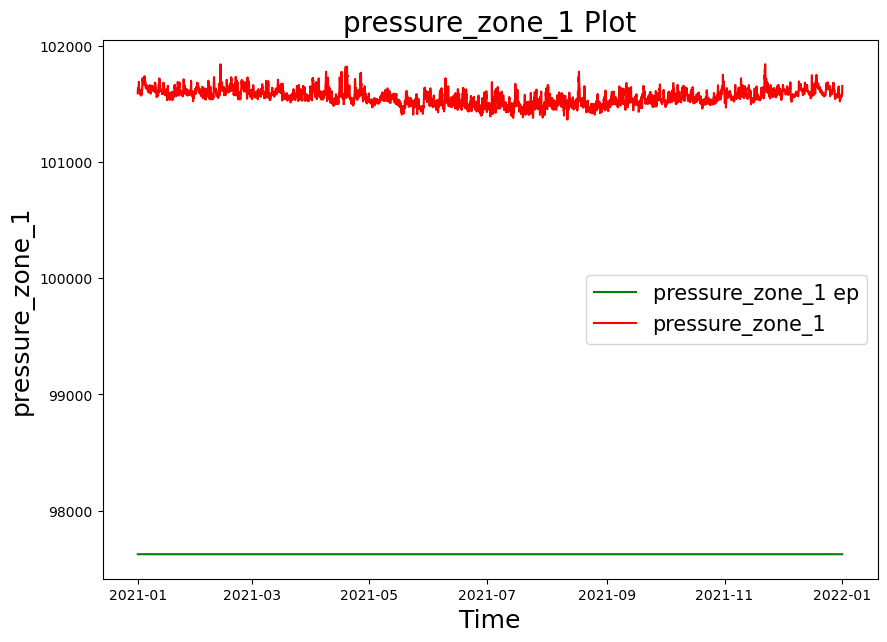

In [62]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,7))
ax.plot(df2['NODE BLOCK1:ZONE1 OUT:System Node Pressure [Pa](Hourly)'], label="pressure_zone_1 ep",color="green")

ax.plot(df1['pressure_zone_1'], label="pressure_zone_1",color="red")

ax.legend(fontsize=15)

ax.set_title(f'pressure_zone_1 Plot',fontsize=20)
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('pressure_zone_1',fontsize=18)
#ax.set_xlim(datetime.datetime(2021,6,4,0,0,0),datetime.datetime(2021,7,12,0,0,0))